In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%reload_ext autoreload

In [3]:
import os

# move to project root
while True:
    # get list of directories
    dirs = os.listdir()
    if "README.md" in dirs:
        break
    else:
        os.chdir("..")
print(os.getcwd())

/home/ra/Codes/multilang_timescale


In [165]:
import numpy as np
import pandas as pd
    
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

import seaborn as sns

from src.utils.utils import (
    two_side_ks_test,
    timescale_permutation_test, 
)

from src.utils.plot import config_plotting, figsize_dict
from src.configurations import timescale_ranges


In [118]:
config_plotting('paper')

# get default font size
default_font_size = plt.rcParams['font.size']


In [168]:
dk_timescale_path = ".temp/result/dk_timescale.npz"
yeos_timescale_path = ".temp/result/yeos_timescale.npz"

image_save_dir = ".temp/image/timescale_selectivity_yeos"

In [43]:
subject_ids = ['COL', 'GFW', 'TYE']

yeo_selected_area = [
    'TempPar',
    'DMN'
]

dk_selected_area = [
    "precuneus",
    "supramarginal",
    "middletemporal",
    "superiortemporal",
    "bankssts",]

naming_dict = {
    "precuneus": "Precuneus",
    "supramarginal": "Supramarginal",
    "middletemporal": "Middle Temporal",
    "superiortemporal": "Superior Temporal",
    "bankssts": "Bankssts",
    "TempPar": "Temporoparietal",
    "DMN": "Default Mode Network",
}

In [ ]:
dk_timescale = np.load(dk_timescale_path, allow_pickle=True)
yeos_timescale = np.load(yeos_timescale_path, allow_pickle=True)

In [170]:
def plot_dual_histogram(timescale_data, selected_area, subject_id, ax):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 5))

    data_en = timescale_data[subject_id].tolist()["en"][selected_area]
    data_zh = timescale_data[subject_id].tolist()["zh"][selected_area]

    valid_en_voxel = np.where(~np.isnan(data_en))[0]
    valid_zh_voxel = np.where(~np.isnan(data_zh))[0]
    shared_voxel = np.intersect1d(valid_en_voxel, valid_zh_voxel)

    data_en = data_en[shared_voxel]
    data_zh = data_zh[shared_voxel]

    # do permutation test
    pval, _ = timescale_permutation_test(data_en, data_zh)

    sns.kdeplot(data_en, ax=ax, label="English", color="blue", fill=True, clip=(0,256))
    sns.kdeplot(data_zh, ax=ax, label="Chinese", color="red", fill=True, clip=(0,256))

    # print pval on the top right corner
    ax.text(0.7, 0.95, f"p={pval:.3f}", fontsize=default_font_size, transform=ax.transAxes)

    # ax.legend()
    # ax.set_title(f"Subject {subject_id}")
    # ax.set_xlabel("Timescale")
    # ax.set_ylabel("Frequency")
    ax.set_xlim(0, 256)
    # remove ylabel
    # if remove_ylabel:
    #ax.set_ylabel("")
    #     #ax.set_yticks([])

    # if remove_xlabel:
    #     ax.set_xlabel("")
    #     #ax.set_xticks([])
    return ax

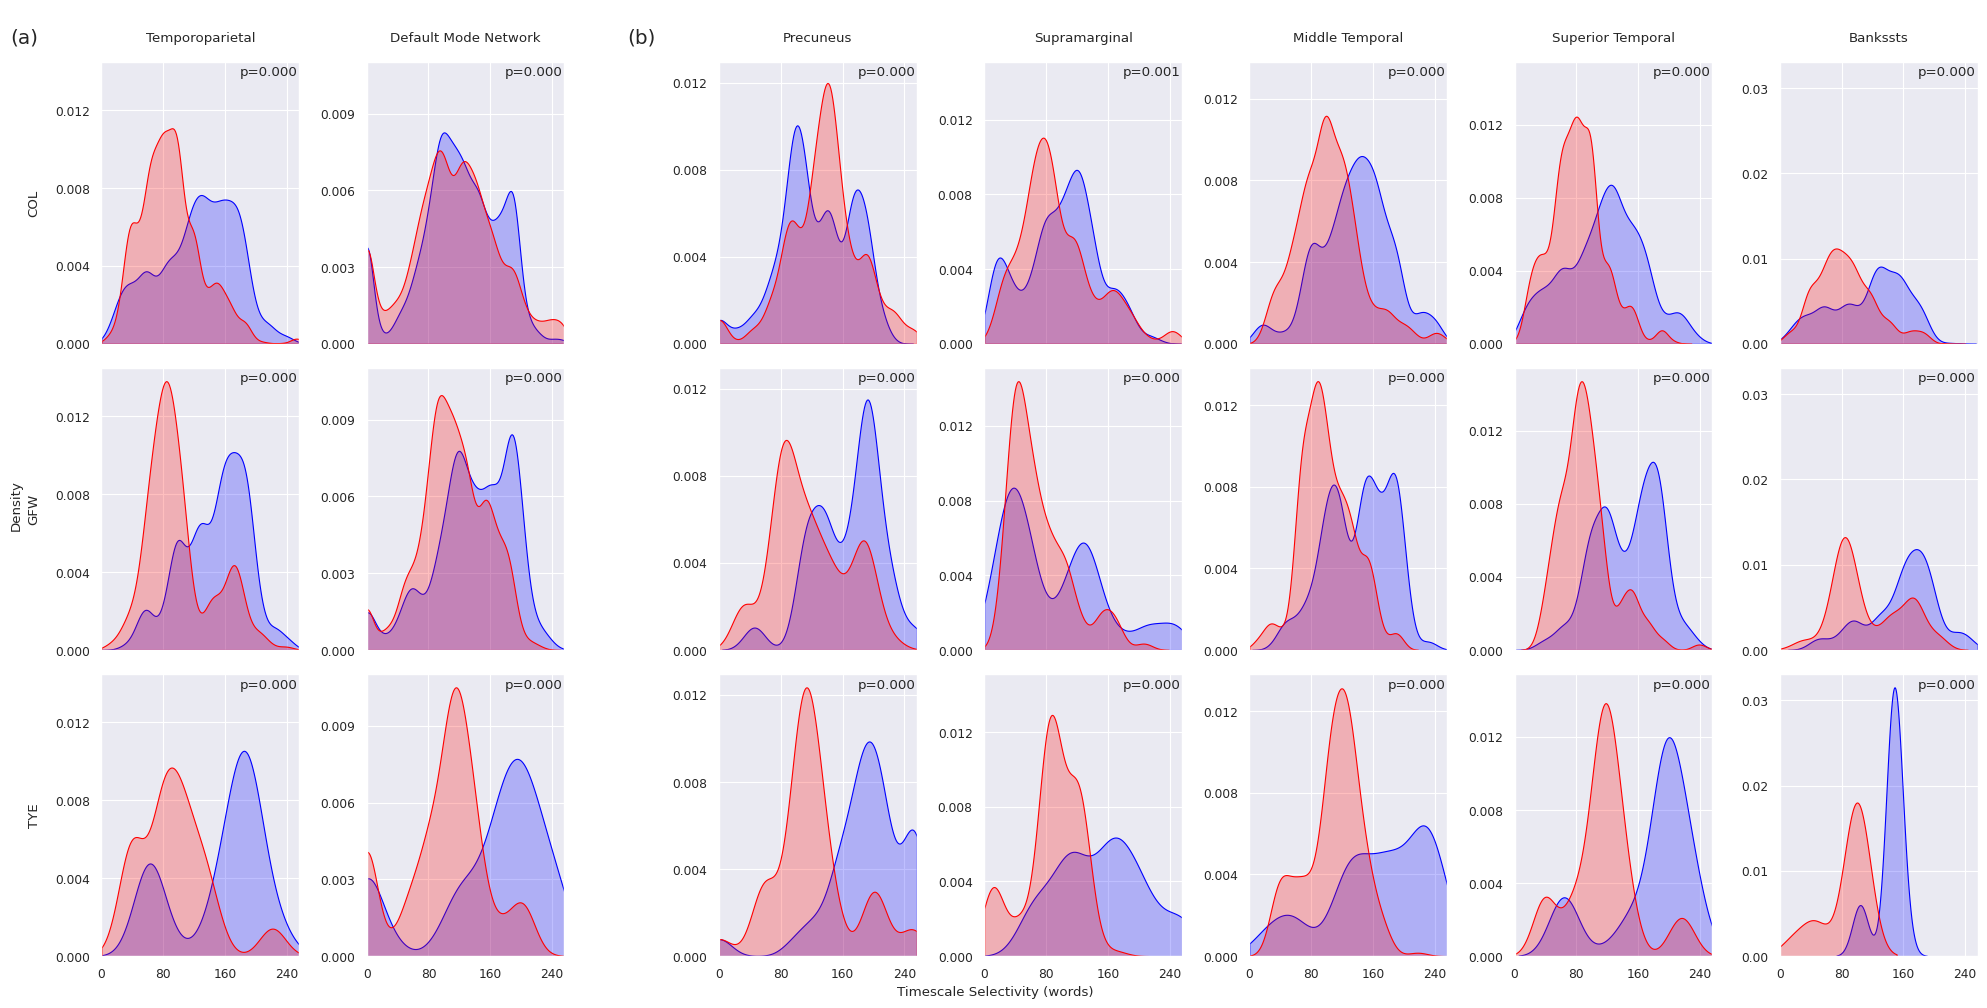

In [171]:
fig, axs = plt.subplots(
    4,
    9,
    figsize=(20, 10),
    sharex=True,
    sharey='col',
    width_ratios=[0.1, 1, 1, 0.1, 1, 1, 1, 1, 1],
    height_ratios=[0.1, 1, 1, 1],
)

# leave column 0 and 3 empty
# plotting yeo's timescale

start_col = 1
start_row = 1
for i, subject_id in enumerate(subject_ids):
    for j, selected_area in enumerate(yeo_selected_area):
        ax = axs[start_row + i, start_col + j]
        ax = plot_dual_histogram(yeos_timescale, selected_area, subject_id, ax)
        ax.xaxis.set_major_locator(MaxNLocator(nbins=4)) 
        ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
        ax.set_ylabel("")

# set print area's name on the first row
for j, selected_area in enumerate(yeo_selected_area):
    axs[0, start_col + j].text(
        0.5,
        0,
        naming_dict[selected_area],
        horizontalalignment="center",
        verticalalignment="center",
        transform=axs[0, start_col + j].transAxes,
    )
    axs[0, start_col + j].axis("off")

start_col = 4
start_row = 1
for i, subject_id in enumerate(subject_ids):
    for j, selected_area in enumerate(dk_selected_area):
        ax = axs[start_row + i, start_col + j]
        ax = plot_dual_histogram(dk_timescale, selected_area, subject_id, ax)
        ax.xaxis.set_major_locator(MaxNLocator(nbins=4)) 
        ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
        ax.set_ylabel("")

for j, selected_area in enumerate(dk_selected_area):
    axs[0, start_col + j].text(
        0.5,
        0,
        naming_dict[selected_area],
        horizontalalignment="center",
        verticalalignment="center",
        transform=axs[0, start_col + j].transAxes,
    )
    axs[0, start_col + j].axis("off")

# now print subject id on the left
for i, subject_id in enumerate(subject_ids):
    axs[start_row + i, 0].text(
        1,
        0.5,
        f"{subject_id}",
        horizontalalignment="center",
        verticalalignment="center",
        transform=axs[start_row + i, 0].transAxes,
        rotation=90,
    )
    axs[start_row + i, 0].axis("off")

axs[0, 0].text(
    0.5,
    0,
    "(a)",
    horizontalalignment="center",
    verticalalignment="center",
    transform=axs[0, 0].transAxes,
    fontsize = default_font_size *1.5
)
axs[0, 0].axis("off")


axs[0, 3].text(
    0.5,
    0,
    "(b)",
    horizontalalignment="center",
    verticalalignment="center",
    transform=axs[0, 3].transAxes,
    fontsize = default_font_size *1.5
)
axs[0, 3].axis("off")
axs[1, 3].axis("off")
axs[2, 3].axis("off")
axs[3, 3].axis("off")


# put 'Density' on the Left
fig.text(0.0075, 0.49, "Density", va="center", rotation="vertical", fontsize=default_font_size)

# put 'Timescale' on the bottom
fig.text(0.5, 0.00, "Timescale Selectivity (words)", ha="center", fontsize=default_font_size)

plt.tight_layout()

plt.savefig(
    os.path.join(image_save_dir, "timescale_selectivity_yeos.png"), dpi=300, bbox_inches="tight"
)

plt.show()